# El juego de la vida 

### Descripción general
El universo del juego de la vida es una rejilla ortogonal bidimensional infinita de celdas cuadradas, cada una de las cuales está en uno de dos estados posibles, vivo o muerto. Cada célula interactúa con sus ocho vecinos, que son las celdas que están directamente en posición horizontal, vertical o digonal. En cada paso en el tiempo, ocurren las siguientes transiciones:
1. Muere cualquier célula viva con menos de dos vecinos vivos, debido a necesidades a la falta de población.
2. Muere cualquier célula viva con más de tres vecinos vivos, debido a sobrepoblación.
3. Cualquier célula viva con dos o tres vecinos vivos vive, sin cambios, para la próxima generación.
4. Cualquier célula muerta con exactamente tres vecinos se convierte en una célula viva.

## Importación de librerías

In [9]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

## Población inicial
Se establece el tamaño del universo ``N`` y el porcentaje ``K`` de celdas en ``1``, que representa la población inicial ``Po``.

In [15]:
N=32; #Tamaño de la rejilla
K=0.15; #Porcentaje de la población inicial
n=0; #Contador
Po=(np.random.rand(N,N)<=K)*1; #Creación de la población inicial
#Po=np.zeros((N,N));
#Po[4,1]=1;
#Po[3,2]=1;
#Po[3,3]=1;
#Po[4,3]=1;
#Po[5,3]=1;

## Funciones 

- Se crea la función ``filtro()``, con el fin de determinar la suma de los vecinos de una célula viva (1) o muerta (0).
#### _Entrada:_ 
``A``: Matriz con elementos ``1`` y ``0`` que representan la población presente. 
#### _Salida:_
``F``: Matriz filtrada, es decir, representa la suma de los vecinos de cada elemento de la matriz ``A``.

In [16]:
def filtro(A):
    h=np.array([[1,1,1],[1,0,1],[1,1,1]]); #Kernel
    F=convolve2d(A,h,mode="same"); #Convolución entre la matriz de población y el Kernel
    return F

- Se crea la función ``condiciones()``, con el fin de evaluar las condiciones del **juego de la vida** a partir de la suma de convolución obtenida con la función ``filtro()``. Esta función actualiza la matriz ``A`` mediante la evaluación de las condiciones.

In [17]:
def condiciones(A):
    F=filtro(A);
    C1=1*((F==2)+(F==3))*A; #Condiciones de células vivas
    C2=1*((F==3))*(1-A); #Condiciones de células muertas
    A=C1+C2;
    return A

- Se crea la función ``poblacion()``, con el objetivo de evaluar las condiciones de la generación o reiniciar la población, es decir, se vuelve al la matriz ``Po`` siempre y cuando el parámetro ``n`` sea igual a 0.

In [18]:
def poblacion():
    global A,Po,n
    if(n==0):
        A=Po;
        n=1;
    else:
        n=n+1;
        A=condiciones(A);
    return A

- Se crea la función ``updatefig()``, con el objetivo de vizualizar cada una de las generaciones con sus respectivas variaciones. Cabe notar que el parámetro de entrada ``i``, determina cada una de las generaciones.

In [19]:
def updatefig(i):
    global n
    label = 'Generación {0}'.format(i)
    if(n>i):
        n=0;
    im.set_array(poblacion())
    plt.title(label)
    return im

## Main 
Se emplea la extensión ``animation.FuncAnimation`` de la librería ``matplotlib.pyplot`` para ilustrar el comportamiento de las generaciones de células vivas que se van actualizando según las condiciones establecidas. Es importante notar que el número de generaciones se representa por la entrada ``frames=np.arange(0,10)``.

<IPython.core.display.Javascript object>


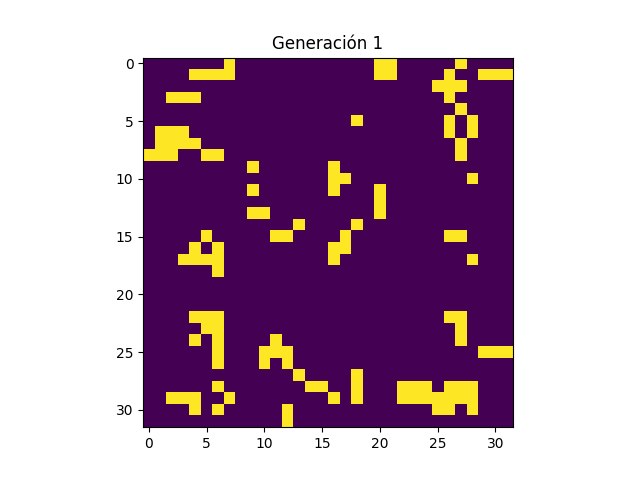

In [20]:
fig = plt.figure() #Crea la figura

im = plt.imshow(poblacion(), animated=True) #Grafica según el parámetro de generación presente

ani = animation.FuncAnimation(fig, updatefig,frames=np.arange(0,10), interval=300, repeat=True)
plt.show() #Muestra la gráfica
